# Hypothesis: 

## More accidents at football stadiums on days of football matches

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.basemap import Basemap

In [3]:
# creating Path object for current working directory
cwd = Path('./')
root_dir = cwd.resolve().parent
# creating Path object for additional data directory
additional_data_dir = root_dir / 'additional_data'
# create new directory for additional data
Path(additional_data_dir).mkdir(exist_ok=True)

# creating Path object for plots directory
plots_dir = root_dir / 'plots'
# create new directory for plots directory
Path(plots_dir).mkdir(exist_ok=True)

# defining the directory to original data
data_dir = Path(root_dir / 'data')

# list the .csv files for the project
for file in data_dir.glob('*.csv'):
    print(file)
    
# reading in .csv files to dataframes
vehicles = pd.read_csv(data_dir / 'vehicles2019.csv', dtype={'Accident_Index': str})
casualties = pd.read_csv(data_dir / 'casualties2019.csv', dtype={'Accident_Index': str})
# cleaned accidents DataFrame
accidents = pd.read_pickle(additional_data_dir / 'accidents_cleaned.pkl')

# convert column names to lowercase for ease of indexing
def lower_columns(df):
    """
    Defintion:
        convert column names to lower case
    """
    df.columns = map(str.lower, df.columns)
    
# converting all column names to lower case
lower_columns(vehicles)
lower_columns(casualties)

accidents.head(5)

/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/accidents2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/casualties2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/vehicles2019.csv


,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,lsoa_of_accident_location,district,converted_date,converted_time,sunrise,sunset,day_length,datetime,decimal_time,day_of_year
0,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,E01003117,lambeth,2019-01-15,21:45:00,0 days 08:00:00,0 days 16:19:00,08:19:00,2019-01-15 21:45:00,21.750000,15
1,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,E01003023,lambeth,2019-01-15,08:42:00,0 days 08:00:00,0 days 16:19:00,08:19:00,2019-01-15 08:42:00,8.700000,15
2,2019010157732,-0.145106,51.461256,1,2,1,2,3,9,E09000022,...,E01003026,lambeth,2019-01-15,07:08:00,0 days 08:00:00,0 days 16:19:00,08:19:00,2019-01-15 07:08:00,7.133333,15
3,2019010157896,-0.240823,51.533125,1,3,2,1,3,28,E09000005,...,E01000535,brent,2019-01-15,21:05:00,0 days 08:00:00,0 days 16:19:00,08:19:00,2019-01-15 21:05:00,21.083333,15
4,2019010157795,0.161736,51.550272,1,3,1,1,3,16,E09000002,...,E01000035,barking and dagenham,2019-01-15,16:10:00,0 days 08:00:00,0 days 16:19:00,08:19:00,2019-01-15 16:10:00,16.166667,15


In [4]:
def sphere_distance(s_lat, s_lng, e_lat, e_lng):
    R = 6373.0
    
    s_lat = s_lat*np.pi/180
    s_lng = np.deg2rad(s_lng)
    e_lat = np.deg2rad(e_lat)
    e_lng = np.deg2rad(e_lng)
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d))

### Test case:

First, a test case shall be run for a football match at Old Trafford football stadium on 24/02/2019

In [5]:
# coordinates for Old Trafford football stadium in Manchester
manc = [53.457831502, -2.288165514]

In [10]:
acc_manc = accidents

# create feature of the distance (in km) of an accident to Old Trafford
acc_manc['dist_from_manc'] = sphere_distance(manc[0], manc[1], acc_manc['latitude'], acc_manc['longitude'])

# filter for those accidents within 5km radius
distance_mask = acc_manc.dist_from_manc < 5
acc_manc = acc_manc[distance_mask]
# filter for Sunday
sunday_mask = acc_manc['day_of_week'] == 1
sunday_manc = acc_manc[sunday_mask]

# group by day and count number of accidents
sundays = sunday_manc.groupby('converted_date')['accident_index'].count()

zscores = stats.zscore(sundays)
zscores['2019-02-24']

converted_date
2019-01-06    1
2019-01-13    2
2019-01-27    2
2019-02-03    1
2019-02-10    1
2019-02-17    1
2019-02-24    3
2019-03-03    1
2019-03-10    3
2019-04-07    1
2019-04-14    1
2019-04-21    1
2019-04-28    2
2019-05-05    1
2019-05-19    2
2019-05-26    2
2019-06-09    1
2019-06-16    2
2019-06-23    1
2019-07-07    1
2019-07-21    1
2019-07-28    3
2019-08-04    1
2019-08-11    1
2019-08-25    1
2019-09-01    1
2019-09-08    3
2019-09-15    1
2019-10-06    1
2019-10-13    1
2019-10-20    4
2019-10-27    2
2019-11-03    3
2019-11-10    3
2019-11-24    4
2019-12-01    1
2019-12-08    3
2019-12-22    2
2019-12-29    3
Name: accident_index, dtype: int64

The value of accidents on the Sunday of the football match is 1.3 standard deviations away from the average. This deserves further investigation.

In [9]:
sunday_manc

,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,district,converted_date,converted_time,sunrise,sunset,day_length,datetime,decimal_time,day_of_year,dist_from_manc
912,201906M266623,-2.333291,53.431257,6,2,2,1,1,112,E08000009,...,trafford,2019-01-06,16:30:00,0 days 08:05:00,0 days 16:06:00,08:01:00,2019-01-06 16:30:00,16.500000,6,4.204082
4790,201906A252903,-2.246876,53.490026,6,2,1,1,1,102,E08000003,...,manchester,2019-01-27,17:00:00,0 days 07:47:00,0 days 16:39:00,08:52:00,2019-01-27 17:00:00,17.000000,27,4.505039
4792,201906E353192,-2.257209,53.448676,6,3,3,2,1,102,E08000003,...,manchester,2019-01-27,14:59:00,0 days 07:47:00,0 days 16:39:00,08:52:00,2019-01-27 14:59:00,14.983333,27,2.289372
6225,201906F253906,-2.294816,53.480553,6,3,2,1,1,107,E08000006,...,salford,2019-02-03,07:45:00,0 days 07:36:00,0 days 16:52:00,09:15:00,2019-02-03 07:45:00,7.750000,34,2.565381
7624,201906A154089,-2.241137,53.474533,6,3,2,1,1,102,E08000003,...,manchester,2019-02-10,03:54:00,0 days 07:25:00,0 days 17:05:00,09:39:00,2019-02-10 03:54:00,3.900000,41,3.626012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70119,201906E356362,-2.250132,53.448826,6,3,2,4,1,102,E08000003,...,manchester,2019-04-21,17:15:00,0 days 05:54:00,0 days 20:05:00,14:11:00,2019-04-21 17:15:00,17.250000,111,2.710987
71345,201906M160244,-2.289798,53.464961,6,2,1,1,1,112,E08000009,...,trafford,2019-08-11,14:28:00,0 days 05:40:00,0 days 20:30:00,14:49:00,2019-08-11 14:28:00,14.466667,223,0.800348
71505,201906A160816,-2.249536,53.478291,6,3,1,1,1,102,E08000003,...,manchester,2019-09-01,03:15:00,0 days 06:13:00,0 days 19:46:00,13:32:00,2019-09-01 03:15:00,3.250000,244,3.423570
71680,201906A261900,-2.225821,53.464173,6,2,1,1,1,102,E08000003,...,manchester,2019-09-15,21:30:00,0 days 06:35:00,0 days 19:14:00,12:38:00,2019-09-15 21:30:00,21.500000,258,4.188454


In [6]:
football = pd.read_csv(additional_data_dir / 'football_stats.csv')
football['datetime'] = pd.to_datetime(football['datetime'])
football['converted_date'] = football['datetime'].dt.date

acc_i = accidents.copy()
football = football.sort_values('day_of_year')
acc_i = acc_i.drop('datetime', axis=1)
football = football.drop('datetime', axis=1)

football.head(5)

,attendance,home_team_name,away_team_name,stadium_name,latitude,longitude,day_of_year,day_of_week,converted_date
0,39052,Everton,Leicester City,Goodison Park,53.4387,-2.966190,1,3,2019-01-01
18,32485,Cardiff City,Tottenham Hotspur,Cardiff City,51.4729,-3.204130,1,3,2019-01-01
9,59887,Arsenal,Fulham,Emirates,51.5549,-0.108436,1,3,2019-01-01
27,30666,Wolverhampton Wanderers,Crystal Palace,Molineux,52.5904,-2.130610,2,4,2019-01-02
36,40668,Chelsea,Southampton,Stamford Bridge,51.4816,-0.191034,2,4,2019-01-02


In [7]:
zscores_list = []
for i in range(football.shape[0]):
    
    coordinates = [football.loc[i, 'latitude'], football.loc[i,'longitude']]
    football_day = football.loc[i, 'day_of_year']
    football_day_of_week = football.loc[i, 'day_of_week']
    football_stadium = football.loc[i, 'stadium_name']
    
    acc_i = accidents.copy()
    
    # add distance from stadium as a feature
    acc_i['dist_from_stadium'] = sphere_distance(coordinates[0], coordinates[1],
                                                 acc_i['latitude'], acc_i['longitude'])

    # filter for those accidents within 5km radius of the stadium
    distance_mask = acc_i['dist_from_stadium'] < 10
    # filter for that day of the week
    day_of_week_mask = acc_i['day_of_week'] == football_day_of_week

    final = acc_i[distance_mask & day_of_week_mask]
    

    final = final.groupby('day_of_year')['accident_index'].count()
    
    zscores = stats.zscore(final)
    mean = final.mean()
    
    if football_day in zscores.index:
        zscore = zscores[football_day]
        accidents_on_day = final[football_day]
    else:
        zscore = 0
        accidents_on_day = 0
    
    info = {
        'Day of match': football_day,
        'Stadium': football_stadium,
        'Accidents on the day of match': accidents_on_day,
        'Mean # Accidents in area': mean,
        'z-score': zscore
    }
    
        
    zscores_list.append(info)

In [8]:
a = pd.DataFrame(zscores_list)
a.drop([])

,Day of match,Stadium,Accidents on the day of match,Mean # Accidents in area,z-score
0,1,Goodison Park,3,4.264151,-0.670671
1,13,Goodison Park,4,3.080000,0.665062
2,33,Goodison Park,1,3.230769,-1.274802
3,37,Goodison Park,3,4.211538,-0.676716
4,62,Goodison Park,3,3.080000,-0.057831
...,...,...,...,...,...
121,93,Tottenham Hotspur,18,17.538462,0.104265
122,103,Tottenham Hotspur,15,17.038462,-0.411199
123,113,Tottenham Hotspur,19,16.773585,0.514289
124,117,Tottenham Hotspur,14,17.038462,-0.612919


In [9]:
b = a.groupby('Stadium').mean()

b = b.drop('Day of match', axis=1)
b.iloc[:, :-1] = b.iloc[:, :-1].round(1)
b.iloc[:, -1] = b.iloc[:, -1].round(2)
b.columns = ['# Day of match', 'Avg # in area', 'z-score']


b.to_csv('test.csv')

In [10]:
a.describe()

,Day of match,Accidents on the day of match,Mean # Accidents in area,z-score
count,126.000000,126.000000,126.000000,126.000000
mean,70.317460,7.420635,7.982430,-0.057616
std,40.084241,7.609839,7.215750,0.817756
min,1.000000,0.000000,1.000000,-2.123445
25%,33.250000,2.000000,2.069183,-0.658984
50%,68.000000,4.000000,4.239919,0.000000
75%,108.750000,14.000000,14.548077,0.359493
max,132.000000,29.000000,24.653846,2.885372


In [11]:
stadium_coords = football.filter(['latitude', 'longitude'])

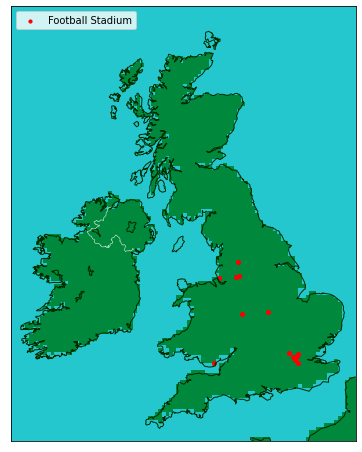

In [14]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
m.drawcoastlines(color='#012C00')
m.drawcountries(color='white')
m.drawlsmask(land_color='#00883D', ocean_color='#23C7CD',lakes=True)

m.scatter(stadium_coords.longitude, stadium_coords.latitude,
          latlon=True,
          alpha=1,
          s=10,
          marker='o',
          label='Football Stadium',
          color='red')

plt.legend(loc='upper left')

fig.savefig(plots_dir / 'stadiums')